분류와 예측 두 가지가 있고. 의사결정과정을 트리 구조로 나타낸다

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [7]:
X.shape

(178, 13)

In [6]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
# 로지스틱회귀를 적용
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)
# 데이터 표준화 Scaled
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)
# 로지스틱회귀로 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
# 평가
lr.score(x_train_scaled,y_train), lr.score(x_test_scaled, y_test)

(1.0, 0.9777777777777777)

In [13]:
# 확률적 경사하강법
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(x_train_scaled,y_train)
# 평가
sgdc.score(x_train_scaled,y_train), sgdc.score(x_test_scaled, y_test)

(1.0, 1.0)

In [14]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train), dt.score(x_test,y_test)

(1.0, 0.9555555555555556)

In [16]:
x_train.shape

(133, 13)

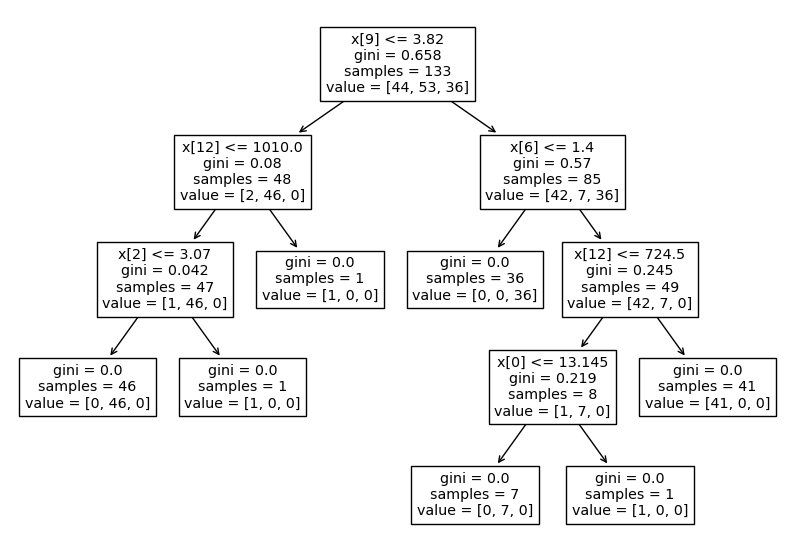

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [17]:
dt.feature_importances_

array([0.01998197, 0.        , 0.02235065, 0.        , 0.        ,
       0.        , 0.41589367, 0.        , 0.        , 0.40331707,
       0.        , 0.        , 0.13845664])

In [26]:
import numpy as np
np.argsort(dt.feature_importances_)[::-1]

array([ 6,  9, 12,  2,  0, 11, 10,  8,  7,  5,  4,  3,  1])

In [ ]:
help(np.sort)

가지치기

0.9924812030075187 0.9555555555555556


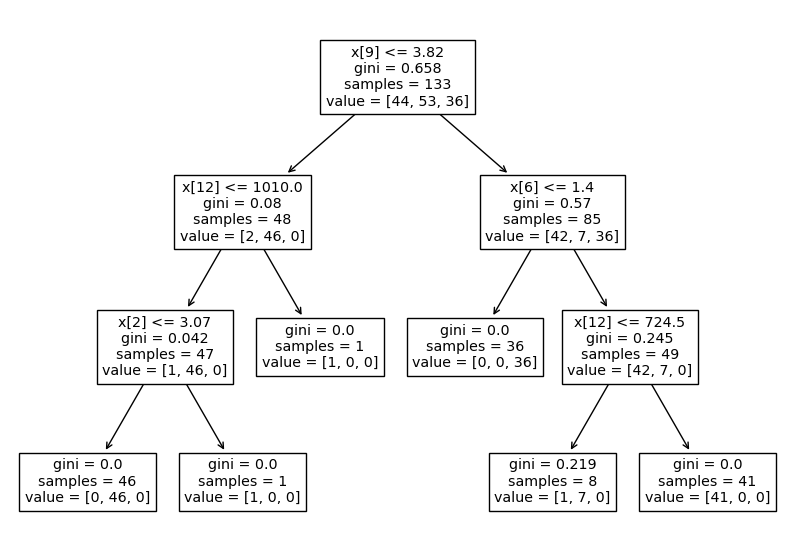

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train), dt.score(x_test,y_test) )

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()


In [29]:
!unzip '/content/archive.zip'  # full path
# !unzip 'archive.zip'  # 상대경로

Archive:  /content/archive.zip
  inflating: winequalityN.csv        


In [32]:
import pandas as pd
wineQuality = pd.read_csv('/content/winequalityN.csv')
wineQuality

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df2 = wineQuality.dropna()
df2.isnull().sum()

In [34]:
len(df2)

6463

In [35]:
X = df2.iloc[:,1:-1]
y = df2.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [36]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_train,y_train), tree.score(x_test,y_test)

(1.0, 0.5872524752475248)

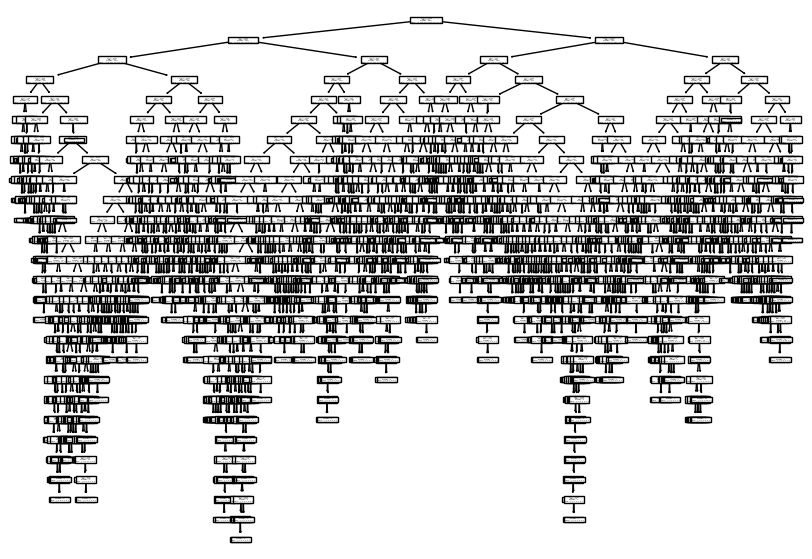

In [37]:
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

0.5403342273571281 0.49814356435643564


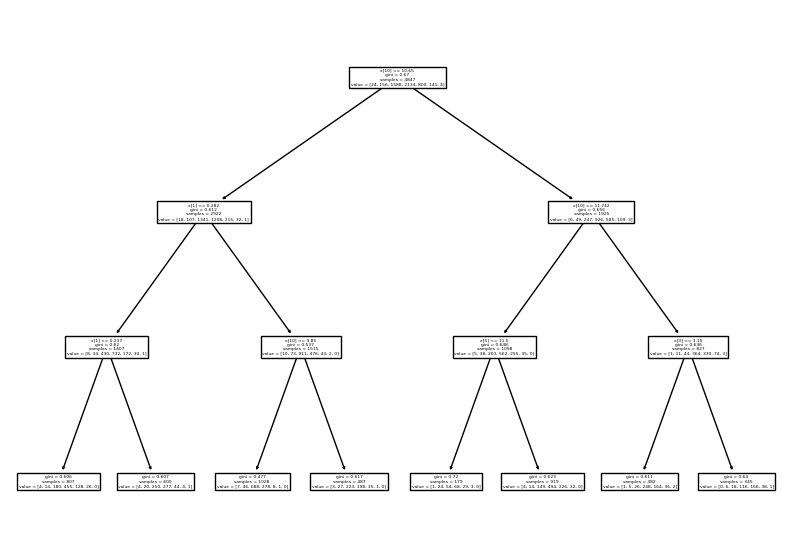

In [43]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
print(tree.score(x_train,y_train), tree.score(x_test,y_test))

plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()